In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast

In [2]:
colors = sns.color_palette("viridis")


In [3]:
#number of functions recorded in history for each operation
#N=7 # for 24 columns in csv
#N=9 # for 30 colums in csv
N=10 # for 33 columns in csv
File_col=[f'File_{i}'for i in range(N)]
func_col= [f'func_{i}'for i in range(N)]
line_col= [f'line_{i}'for i in range(N)]

col_names=['Operator', 'Op1', 'Op2'] + File_col +func_col + line_col
ordered_by_step=['Operator', 'Op1', 'Op2'] + np.concatenate([[f'File_{i}', f'func_{i}',f'line_{i}'] for i in range(N)]).tolist()
reversed_ordered_by_step=['Operator', 'Op1', 'Op2'] + np.concatenate([[f'File_{i}', f'func_{i}',f'line_{i}'] for i in range(N-1, -1, -1)]).tolist()
ordered_by_type=['Operator', 'Op1', 'Op2'] + [f'File_{i}'for i in range(N-1, -1, -1)] +[f'func_{i}'for i in range(N-1, -1, -1)]+[f'line_{i}'for i in range(N-1, -1, -1)]
op = pd.read_csv('./data/urdf/op4.csv', sep=",",header=None, names=col_names)
op=op[ordered_by_step]
op[line_col]=op[line_col].fillna(0).astype(int) # cast line number as ints (0 means empty cell)


display(op)


,Operator,Op1,Op2,File_0,func_0,line_0,File_1,func_1,line_1,File_2,...,line_6,File_7,func_7,line_7,File_8,func_8,line_8,File_9,func_9,line_9
0,mul,[[1. 0. 0. 0.]\n [0. 1. 0. 0.]\n [0. 0. 1. 0.]...,[[ 1. -0. 0. 0.]\n [ 0. 1. 0. 0.]\n [ 0. ...,RBDReference.py,end_effector_positions,132,TrajoptCost.py,delta_x,412,TrajoptCost.py,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
1,mul,[[1. 0. 0. 0.]\n [0. 1. 0. 0.]\n [0. 0. 1. 0.]...,[[ 1. -0. 0. 0.]\n [ 0. 1. 0. 1.]\n [ 0. ...,RBDReference.py,end_effector_positions,132,TrajoptCost.py,delta_x,412,TrajoptCost.py,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
2,mul,[[1. 0. 0. 0.]\n [0. 1. 0. 1.]\n [0. 0. 1. 0.]...,[[0]\n [1]\n [0]\n [1]],RBDReference.py,end_effector_positions,133,TrajoptCost.py,delta_x,412,TrajoptCost.py,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
3,mul,[[1. 0. 0. 0.]\n [0. 1. 0. 0.]\n [0. 0. 1. 0.]...,[[-0. -1. 0. 0.]\n [ 1. -0. 0. 0.]\n [ 0. ...,RBDReference.py,Jacobian,358,TrajoptCost.py,compute_J,390,TrajoptCost.py,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
4,mul,[[ 0. -1. 0. 0.]\n [ 1. 0. 0. 0.]\n [ 0. ...,[[ 1. -0. 0. 0.]\n [ 0. 1. 0. 1.]\n [ 0. ...,RBDReference.py,Jacobian,358,TrajoptCost.py,compute_J,390,TrajoptCost.py,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,mul,[[-1.5651 -0.5698]\n [-0.9186 -0.8218]],[-0.0106 0.0095],TrajoptCost.py,delta_x,414,NaN,NaN,0,NaN,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
21996,reshape,[0.0111 0.0019],"(2, 1)",TrajoptCost.py,delta_x,415,NaN,NaN,0,NaN,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
21997,vstack,[[-0.9186]\n [ 1.5651]],[[0.0111]\n [0.0019]],TrajoptCost.py,delta_x,416,NaN,NaN,0,NaN,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
21998,reshape,[[-0.9186]\n [ 1.5651]\n [ 0.0111]\n [ 0.0019]],"(4,)",TrajoptCost.py,delta_x,417,NaN,NaN,0,NaN,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0


In [4]:
def filter_by_filename(df,name):
    return df[df[File_col].isin([name]).any(axis=1)]

def filter_by_function(df,name):
    return df[df[func_col].isin([name]).any(axis=1)]

def filter_col(df,col,name):
    return df[df[col].isin([name]).any(axis=1)]


def filter_out_by_index(df,indexes,multiple=False):
    if multiple:
        list_indexes = [idx for sublist in indexes for idx in sublist]
        # list_indexes=[list(index) for index in indexes].flatten()
        return df[~df.index.isin(list_indexes)]
    else:
        return df[~df.index.isin(list(indexes))]

   

def unique_filenames(df):
    unique_file_prev=list(op['File_0'].unique())
    for col in File_col:
        unique_file= [file for file in op[col].unique() if (file not in unique_file_prev)] + unique_file_prev
        unique_file_prev=unique_file
    return unique_file

def unique_functions(df):
    unique_func_prev=list(op['func_0'].unique())
    for col in func_col:
        unique_func= [func for func in op[col].unique() if (func not in unique_func_prev) and func is not None] + unique_func_prev
        unique_func_prev=unique_func
    return unique_func

List of unique functions in history

In [5]:
unique_functions(op)

['compute_J',
 'totalCost',
 'rnea',
 'minv',
 'dJdq',
 'd2Jdq2',
 'fxS',
 '__init__',
 'solve',
 nan,
 'end_effector_positions',
 'Jacobian',
 'equals_or_hstack',
 'delta_x',
 'value',
 'totalHardConstraintViolation',
 'rnea_fpass',
 'cross_operator',
 'mxS',
 'vxIv',
 'rnea_bpass',
 'minv_bpass',
 'minv_fpass',
 'forward_dynamics',
 'qdd_to_xdot',
 'integrator',
 'formKKTSystemBlocks',
 'jacobian_tot_state',
 'dJtotdq',
 'hessian',
 'gradient',
 'forward_dynamics_gradient',
 'rnea_grad_fpass_dq',
 'rnea_grad_fpass_dqd',
 'rnea_grad_bpass_dq',
 'rnea_grad_bpass_dqd',
 'rnea_grad',
 'dqdd_to_dxdot',
 'solveKKTSystem_Schur',
 'compute_preconditioner',
 'pcg',
 'SQP']

List of unique Files in history

In [6]:
unique_filenames(op)

[nan,
 'RBDReference.py',
 'TrajoptCost.py',
 'TrajoptMPCReference.py',
 'TrajoptPlant.py',
 'PCG.py']

No operations are being measurement in URDF parser (operations to create the Xmat, S, Imat matrices ...)

## Classify operations : Dynamics vs Optimization

In [7]:

cost_op =filter_by_filename(op,'TrajoptCost.py')
sqp_op = filter_by_filename(op,'TrajoptMPCReference.py')
dynamics_op = filter_by_filename(op,'TrajoptPlant.py')

print('Total number of operations: ', op.shape[0])
print('SQP operations: ',sqp_op.shape[0])
print('Cost operations: ', cost_op.shape[0])
print('Dynamics operations: ', dynamics_op.shape[0])



Total number of operations:  22000
SQP operations:  21769
Cost operations:  8251
Dynamics operations:  12429


In [8]:
def first_call(df):
    last_functions=[]
    last_lines=[]

    for index,row in df.iterrows():
        for i in range(N):  
          if(row[f'line_{i}']==0):
             last_functions.append(row[f'func_{i-1}'])
             last_lines.append(row[f'line_{i-1}'])
             break

    return last_functions,last_lines

def last_call(op):
   return op


In [9]:
remaining_ops = filter_out_by_index(op,sqp_op.index) # operations not called from TrajoptMPCReference
last_functions,last_lines=first_call(remaining_ops)
print("last function\n", last_functions)
print("last lines\n", last_lines)


last function
 ['value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'value', 'va

Not important => post optimization operations  
Keep only operations made from SQP

In [10]:
op=sqp_op

In [11]:
# remaining_ops = op[~op.index.isin(list(cost_op.index) + list(dynamics_op.index))]
non_classified_ops = filter_out_by_index(op,[cost_op.index,dynamics_op.index] ,multiple=True)
# print(f'There are {remaining_ops.shape[0]} unclassified rows (Not in Cost, not in Plant, intern to SQP)')
print(f'There are {non_classified_ops.shape[0]} unclassified rows (Not in Cost, not in Plant, intern to SQP)')


There are 1320 unclassified rows (Not in Cost, not in Plant, intern to SQP)


### Proportion of operations made in TrajoptCost, TrajoptPlant and other  
(later will add TrajoptConstraints)

/tmp/ipykernel_84743/3761048392.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_labels, y=proportions, palette=colors)
/tmp/ipykernel_84743/3761048392.py:8: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot(x=class_labels, y=proportions, palette=colors)


Text(0.5, 1.0, 'Proportion of Operations (in %)')

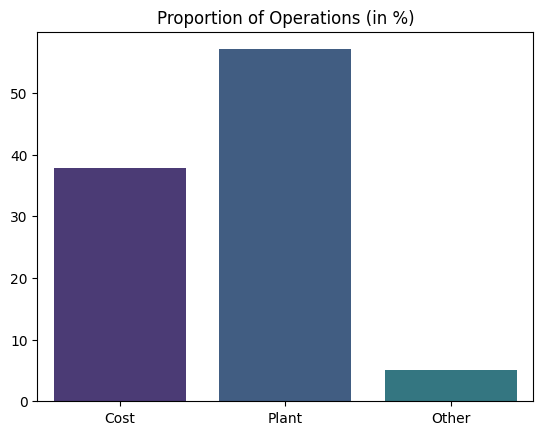

In [12]:
class_labels=['Cost','Plant','Other']
n_tot=sqp_op.shape[0]
prop_cost=(cost_op.shape[0]/n_tot)*100
prop_plant=(dynamics_op.shape[0]/n_tot)*100
prop_other=((n_tot-(cost_op.shape[0]+dynamics_op.shape[0]))/n_tot)*100

proportions=[prop_cost,prop_plant,prop_other]
sns.barplot(x=class_labels, y=proportions, palette=colors)
plt.title('Proportion of Operations (in %)')

#### Cost Value, gradient and Hessian

/tmp/ipykernel_84743/1163342886.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_pos , y=proportions, width= width, palette=colors, ax=ax, label='Proportion')
/tmp/ipykernel_84743/1163342886.py:16: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot(x=x_pos , y=proportions, width= width, palette=colors, ax=ax, label='Proportion')


[Text(0, 0, 'Value'), Text(1, 0, 'Gradient'), Text(2, 0, 'Hessian')]

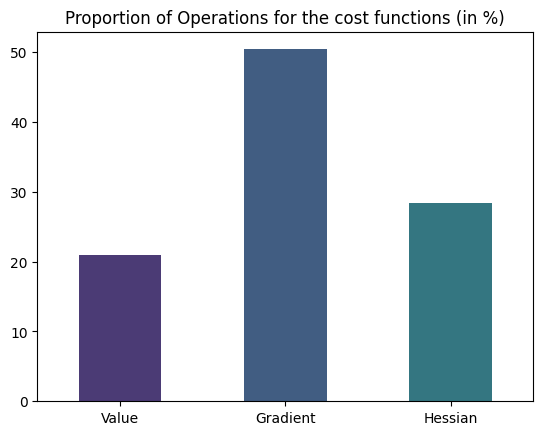

In [13]:
cost_value_op = cost_op[cost_op[func_col].isin(['value']).any(axis=1)]
cost_grad_op = cost_op[cost_op[func_col].isin(['gradient']).any(axis=1)]
cost_hess_op = cost_op[cost_op[func_col].isin(['hessian']).any(axis=1)]

prop_value = (cost_value_op.shape[0]/cost_op.shape[0])*100 
prop_grad = (cost_grad_op.shape[0]/cost_op.shape[0])*100
prop_hess = (cost_hess_op.shape[0]/cost_op.shape[0])*100 
x_labels = ['Value', 'Gradient', 'Hessian']
proportions = [prop_value,prop_grad,prop_hess]
counts = [cost_value_op.shape[0],cost_grad_op.shape[0],cost_hess_op.shape[0]]


fig, ax = plt.subplots()
width = 0.5
x_pos = np.arange(len(x_labels))
sns.barplot(x=x_pos , y=proportions, width= width, palette=colors, ax=ax, label='Proportion')
# sns.barplot(x=x_pos , y=counts, width= width/2, palette=colors, ax=ax, label='Counts')
plt.title('Proportion of Operations for the cost functions (in %)')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels)


TODO Compare to number of times called  
consecutives rows with value = 1 call of value

In [14]:
def n_function_calls(df,name):
    call_started=[False]*N
    call_ended=[0]*N
    for i, row in df.iterrows():
        last_row= (i==df.shape[0]-1)
        for j,col in enumerate(func_col):
            if(row[col]==name):
                call_started[j]=True
                if last_row: call_ended[j] += 1 
            else:
                if call_started[j]: call_ended[j] += 1  
                call_started[j]=False
    return int(sum(call_ended))


/tmp/ipykernel_84743/1817789979.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_pos , y=op_per_call, width= width, palette=colors, ax=ax, label='Proportion')
/tmp/ipykernel_84743/1817789979.py:15: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot(x=x_pos , y=op_per_call, width= width, palette=colors, ax=ax, label='Proportion')


[Text(0, 0, 'Value'), Text(1, 0, 'Gradient'), Text(2, 0, 'Hessian')]

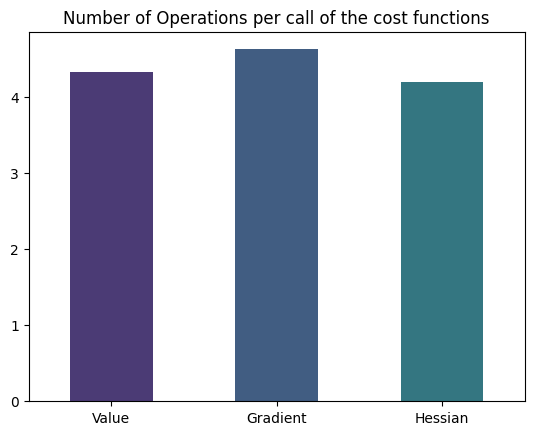

In [15]:
n_calls_value= n_function_calls(cost_op,'value')
n_calls_gradient= n_function_calls(cost_op,'gradient')
n_calls_hessian=  n_function_calls(cost_op,'hessian')

cost_value_n_op = cost_op[cost_op[func_col].isin(['value']).any(axis=1)].shape[0]
cost_grad_n_op = cost_op[cost_op[func_col].isin(['gradient']).any(axis=1)].shape[0]
cost_hess_n_op = cost_op[cost_op[func_col].isin(['hessian']).any(axis=1)].shape[0]

x_labels = ['Value', 'Gradient', 'Hessian']
op_per_call = [cost_value_n_op/n_calls_value,cost_grad_n_op/n_calls_gradient,cost_hess_n_op/n_calls_hessian]

fig, ax = plt.subplots()
width = 0.5
x_pos = np.arange(len(x_labels))
sns.barplot(x=x_pos , y=op_per_call, width= width, palette=colors, ax=ax, label='Proportion')
plt.title('Number of Operations per call of the cost functions')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels)


### Analyze size of operands

In [16]:
display(op[['Op1', 'Op2']])

,Op1,Op2
0,[[1. 0. 0. 0.]\n [0. 1. 0. 0.]\n [0. 0. 1. 0.]...,[[ 1. -0. 0. 0.]\n [ 0. 1. 0. 0.]\n [ 0. ...
1,[[1. 0. 0. 0.]\n [0. 1. 0. 0.]\n [0. 0. 1. 0.]...,[[ 1. -0. 0. 0.]\n [ 0. 1. 0. 1.]\n [ 0. ...
2,[[1. 0. 0. 0.]\n [0. 1. 0. 1.]\n [0. 0. 1. 0.]...,[[0]\n [1]\n [0]\n [1]]
3,[[1. 0. 0. 0.]\n [0. 1. 0. 0.]\n [0. 0. 1. 0.]...,[[-0. -1. 0. 0.]\n [ 1. -0. 0. 0.]\n [ 0. ...
4,[[ 0. -1. 0. 0.]\n [ 1. 0. 0. 0.]\n [ 0. ...,[[ 1. -0. 0. 0.]\n [ 0. 1. 0. 1.]\n [ 0. ...
...,...,...
21764,[0.0814 0.0651 0.0111 0.0019],NaN
21765,[0.0814 0.0651 0.0111 0.0019],[[100. 0. 0. 0.]\n [ 0. 100. 0. 0.]...
21766,[8.1376 6.5057 1.1138 0.192 ],[[-1.5651 -0.5698 0. 0. ]\n [-0.9186 ...
21767,[-18.7163 -9.9837 -1.9196 -0.7924],"(4,)"


Cast operands as numpy arrays  
### TODO fix

In [17]:
def str_to_array(s):
    if s is None :#or s == 'nan':
        return None
    try:
        s = s.replace('\n', ' ').replace('  ', ' ').replace(' ', ',').replace('],]', ']]')
        s = s.replace(',]', ']').replace('[,', '[').replace(',,,', ',').replace(',,', ',').replace('[,', '[')
        matrix_as_list = ast.literal_eval(s)
        return np.array(matrix_as_list)
    except:
        print("Problem with : ", s)

op['Op1'] = op['Op1'].apply(str_to_array)
op['Op2'] = op['Op2'].apply(str_to_array)



Problem with :  [[4.,2.,0.,...,0.,0.,0.],[2.,1.,0.,...,0.,0.,0.],[0.,0.,4.,...,0.,0.,0.],...,[0.,0.,0.,...,100.,0.,0.],[0.,0.,0.,...,0.,400.,200.],[0.,0.,0.,...,0.,200.,100.]]
Problem with :  [[4.001,2.,0.,...,0.,0.,0.,],[2.,1.001,0.,...,0.,0.,0.,],[0.,0.,4.001,...,0.,0.,0.,],...,[0.,0.,0.,...,100.001,0.,0.,],[0.,0.,0.,...,0.,400.001,200.,],[0.,0.,0.,...,0.,200.,100.001]]
Problem with :  [[1.,0.,0.,...,0.,0.,0.],[0.,1.,0.,...,0.,0.,0.],[0.,0.,1.,...,0.,0.,0.],...,[0.,0.,0.,...,1.,0.,0.],[0.,0.,0.,...,0.,1.,0.],[0.,0.,0.,...,0.,0.,1.]]
Problem with :  [[200.16,-399.92,0.,...,0.,0.,0.,],[-399.92,800.04,0.,...,0.,0.,0.,],[0.,0.,200.16,...,0.,0.,0.,],...,[0.,0.,0.,...,800.0004,0.,0.,],[-0.,-0.,-0.,...,-0.,200.0016,-399.9992],[0.,0.,0.,...,0.,-399.9992,800.0004]]
Problem with :  [[1.,0.,0.,...,0.,0.,0.],[0.,1.,0.,...,0.,0.,0.],[0.,0.,1.,...,0.,0.,0.],...,[0.,0.,0.,...,1.,0.,0.],[0.,0.,0.,...,0.,1.,0.],[0.,0.,0.,...,0.,0.,1.]]
Problem with :  [[0.,0.,0.,...,0.,0.,0.],[0.,0.,0.,...,0.,0.,0.],

In [18]:
display(op[['Op1', 'Op2']])

,Op1,Op2
0,"[[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [...","[[1.0, -0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], ..."
1,"[[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [...","[[1.0, -0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 1.0], ..."
2,"[[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 1.0], [...","[[0], [1], [0], [1]]"
3,"[[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [...","[[-0.0, -1.0, 0.0, 0.0], [1.0, -0.0, 0.0, 0.0]..."
4,"[[0.0, -1.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0], ...","[[1.0, -0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 1.0], ..."
...,...,...
21764,"[0.0814, 0.0651, 0.0111, 0.0019]",None
21765,"[0.0814, 0.0651, 0.0111, 0.0019]","[[100.0, 0.0, 0.0, 0.0], [0.0, 100.0, 0.0, 0.0..."
21766,"[8.1376, 6.5057, 1.1138, 0.192]","[[-1.5651, -0.5698, 0.0, 0.0], [-0.9186, -0.82..."
21767,"[-18.7163, -9.9837, -1.9196, -0.7924]",[4]


In [19]:
op['Shape1']= op['Op1'].apply(lambda x: np.shape(x))
op['Shape2']= op['Op2'].apply(lambda x: np.shape(x))


In [20]:
hess=filter_by_function(op,'hessian')
print("In hessian operations, size of :\n \t- the first operand : ", hess['Shape1'].unique())
print("\t- the second operand : ", hess['Shape2'].unique())


In hessian operations, size of :
 	- the first operand :  [(4, 4) (3, 1) (4, 2) (4,) (2, 2) (2, 4) (2,) (2, 1) (4, 1) (4, 6)]
	- the second operand :  [(4, 4) (4, 1) (3, 1) (2,) (2, 2) (2, 4) (4, 2) (3,) (2, 1) (1,) (4,) ()
 (2, 6)]


In [21]:
def unique_from_set_of_col(df, col_set):
    unique_prev=[]
    for col in col_set:
        unique= [element for element in op[col].unique() if (element not in unique_prev)] + unique_prev
        unique_prev=unique
    return unique
    

In [22]:
shapes=['Shape1','Shape2']
unique_from_set_of_col(op, shapes)

[(3,),
 (1, 1),
 (4, 4),
 (3, 1),
 (2, 2),
 (2,),
 (2, 1),
 (4, 1),
 (4,),
 (),
 (6, 6),
 (6,),
 (36,),
 (1,),
 (6, 1),
 (4, 2),
 (2, 4),
 (4, 6),
 (6, 2),
 (2, 6),
 (40, 1),
 (40,),
 (1, 40),
 (58, 1)]

Create a mapping () => (1,1) ,  (n,)=>(6,1)

In [23]:

op['Shape1']=op['Shape1'].apply(lambda x: (x[0],1) if len(x)==1 else (1,1) if len(x)==0 else x)
op['Shape2']=op['Shape1'].apply(lambda x: (x[0],1) if len(x)==1 else (1,1) if len(x)==0 else x)
unique_from_set_of_col(op, shapes)


[(4, 4),
 (3, 1),
 (2, 2),
 (2, 1),
 (4, 1),
 (1, 1),
 (6, 6),
 (6, 1),
 (36, 1),
 (4, 2),
 (2, 4),
 (4, 6),
 (6, 2),
 (2, 6),
 (40, 1),
 (1, 40),
 (58, 1)]

### Analyze operands

Would need to classify op by variables. That way, can analyze the sparsity pattern of specific variable isntead of all similar dimension variables

Same variable = same (function_0, line_0) = line where the operation is made

In [24]:
group_by_operation=op.groupby(['File_0','line_0'])
variables_op1=[element for element in group_by_operation['Op1']] # [element for element in group_by_operation['Op2']]
variables_op2=[element for element in group_by_operation['Op2']] 
print(f"There are {len(group_by_operation)} lines of operations.\nOne line might contain multiple operations")
print("\nNumber of times each Line of operation is executed:")
group_by_operation=op.groupby(['File_0','line_0']).count()
group_by_operation=group_by_operation.reset_index()
group_by_operation.rename(columns={'Operator': 'Count', 'File_0':'File', 'line_0':'line'}, inplace=True)
display(group_by_operation[['File','line','Count']])



There are 117 lines of operations.
One line might contain multiple operations

Number of times each Line of operation is executed:


,File,line,Count
0,PCG.py,72,4
1,PCG.py,76,8
2,PCG.py,77,4
3,PCG.py,79,8
4,PCG.py,87,65
...,...,...,...
112,TrajoptPlant.py,97,36
113,TrajoptPlant.py,385,270
114,TrajoptPlant.py,398,72
115,TrajoptPlant.py,400,36


Add i column to differentiate operations with same operator on same line

In [25]:
op['i'] = 1

consecutive_count = 1
for index in range(1, len(op)):
    # Check if consecutive operations are on the same line and of the same type, if so add i feature to distinguish them
    if (op.loc[index, 'File_0'] == op.loc[index - 1, 'File_0']) and  (op.loc[index, 'line_0'] == op.loc[index - 1, 'line_0']) and (op.loc[index, 'Operator'] == op.loc[index - 1, 'Operator']):
       consecutive_count += 1
    else:
        consecutive_count = 1
    
    op.loc[index, 'i'] = consecutive_count

In [26]:
print("Types of operation recorded: ",op['Operator'].unique())

Types of operation recorded:  ['mul' 'hstack' 'reshape' 'vstack' 'sub' 'transpose' 'add' 'invert_matrix']


In [27]:
display(op[(op['Operator']=='invert_matrix') & (op['Op1'].isnull())])

,Operator,Op1,Op2,File_0,func_0,line_0,File_1,func_1,line_1,File_2,...,line_7,File_8,func_8,line_8,File_9,func_9,line_9,Shape1,Shape2,i
4039,invert_matrix,None,None,TrajoptMPCReference.py,solveKKTSystem_Schur,325,TrajoptMPCReference.py,SQP,494,NaN,...,0,NaN,NaN,0,NaN,NaN,0,"(1, 1)","(1, 1)",1
9851,invert_matrix,None,None,TrajoptMPCReference.py,solveKKTSystem_Schur,325,TrajoptMPCReference.py,SQP,494,NaN,...,0,NaN,NaN,0,NaN,NaN,0,"(1, 1)","(1, 1)",1
14581,invert_matrix,None,None,TrajoptMPCReference.py,solveKKTSystem_Schur,325,TrajoptMPCReference.py,SQP,494,NaN,...,0,NaN,NaN,0,NaN,NaN,0,"(1, 1)","(1, 1)",1
19323,invert_matrix,None,None,TrajoptMPCReference.py,solveKKTSystem_Schur,325,TrajoptMPCReference.py,SQP,494,NaN,...,0,NaN,NaN,0,NaN,NaN,0,"(1, 1)","(1, 1)",1


In [28]:
# display(op[op['Operator']=='transpose'])
display(op[(op['Operator']=='transpose') & (op['Op1'].isnull())])

,Operator,Op1,Op2,File_0,func_0,line_0,File_1,func_1,line_1,File_2,...,line_7,File_8,func_8,line_8,File_9,func_9,line_9,Shape1,Shape2,i
4040,transpose,None,None,TrajoptMPCReference.py,solveKKTSystem_Schur,326,TrajoptMPCReference.py,SQP,494,NaN,...,0,NaN,NaN,0,NaN,NaN,0,"(1, 1)","(1, 1)",1
4268,transpose,None,None,TrajoptMPCReference.py,solveKKTSystem_Schur,340,TrajoptMPCReference.py,SQP,494,NaN,...,0,NaN,NaN,0,NaN,NaN,0,"(1, 1)","(1, 1)",1
9852,transpose,None,None,TrajoptMPCReference.py,solveKKTSystem_Schur,326,TrajoptMPCReference.py,SQP,494,NaN,...,0,NaN,NaN,0,NaN,NaN,0,"(1, 1)","(1, 1)",1
10092,transpose,None,None,TrajoptMPCReference.py,solveKKTSystem_Schur,340,TrajoptMPCReference.py,SQP,494,NaN,...,0,NaN,NaN,0,NaN,NaN,0,"(1, 1)","(1, 1)",1
14582,transpose,None,None,TrajoptMPCReference.py,solveKKTSystem_Schur,326,TrajoptMPCReference.py,SQP,494,NaN,...,0,NaN,NaN,0,NaN,NaN,0,"(1, 1)","(1, 1)",1
14834,transpose,None,None,TrajoptMPCReference.py,solveKKTSystem_Schur,340,TrajoptMPCReference.py,SQP,494,NaN,...,0,NaN,NaN,0,NaN,NaN,0,"(1, 1)","(1, 1)",1
19324,transpose,None,None,TrajoptMPCReference.py,solveKKTSystem_Schur,326,TrajoptMPCReference.py,SQP,494,NaN,...,0,NaN,NaN,0,NaN,NaN,0,"(1, 1)","(1, 1)",1
19576,transpose,None,None,TrajoptMPCReference.py,solveKKTSystem_Schur,340,TrajoptMPCReference.py,SQP,494,NaN,...,0,NaN,NaN,0,NaN,NaN,0,"(1, 1)","(1, 1)",1


Why is the variable name not recorded for those operations ?

### Get variable names from file

### TODO how to get variables for hstack, invert_matrix, transpose, reshape

In [29]:
process_err=pd.DataFrame(columns=op.columns)

In [30]:
import re



operations_dict = {
    "mul": ["*", "@"],
    "add": "+",
    "sub": "-",
    
}
functions=['transpose','reshape','invert_matrix','hstack','vstack']

def clean_word(input_string,left=False):
    chars_to_remove = ['*','@','+','-','=',' ',',']
    words_to_remove = ['.T', '.transpose()','matrix_(', 'self.']
    if left:
        input_string = input_string[::-1] # reverse the word
    result = []
    for char in input_string:
        if char in chars_to_remove:
            break
        result.append(char)

    if left:
        result = result[::-1] #reverse again
    
    result= ''.join(result)
    for element in words_to_remove:
        result = result.replace(element, '')
        
    return result
    #     #go from left to right            
    #     return ''.join(char for char in input_string while char not in chars_to_remove)
    # else:
    #     # reverse then go from left to right
    #     clean_word = ''.join(char for char in input_string[::-1] while char not in chars_to_remove)
    #     return clean_word[::,-1]

def retrieve_variables_from_line(input_string, operator,i):
    parts = input_string.split(operator)
    if len(parts) > 2:
        word_left = parts[i-1].strip()#.split()[-1] # last word from left side of the split
        word_right = parts[i].strip()#.split()[0]
    else:
        if len(parts)==0:
            raise ValueError("Problem with : ", input_string)
        else:
            word_left = parts[0].strip()#.split()[-1] # last word from left side of the split
            word_right = parts[1].strip()#.split()[0] # first word from right side of the split
            
    word_left=clean_word(word_left,left=True)
    word_right=clean_word(word_right,left=False)
    return word_left, word_right


def retrieve_line_as_string(row):
    file_name = row['File_0']
    line = row['line_0']
    if file_name == 'RBDReference.py':
        file = open(f'../GRiD/RBDReference/RBDReference.py') 
    elif file_name == 'PCG.py':
        file = open(f'../GBD-PCG-Python/PCG.py') 
    else:
        file = open(f'../{file_name}') 
    content = file.readlines() 
    try:
        op = content[line-1]
    except:
        print("File")
    return op

"""
if not match
    arg1=method2

if match and 1 argument
    arg1=method2

if match and 2 arguments
    arg1=method1, 1



if not match

    arg2=None
if match and 1 argument

    arg2=method1, 1
if match and 2 arguments

    arg2=method1, 2
"""

def find_function_prefix(string, function):
    index = string.find('.' + function)
    if index != -1:
        return string[:index]
    else:
        return None
    
def extract_arg(string,function,arg_i):
    pattern = fr'{function}\((\w+),\s*(\w+)\)'
    match = re.search(pattern, string)
    var1=None
    var2=None
    if match: # if found arguments
        if len(match.groups())>1: #if 2 arguments inside parenthesis
            var1=match.group(1)
            var2=match.group(2)
        else: # if one argument
            var1=find_function_prefix(string,function) #frist argument is prefix
            var1=clean_word(var1,left=True)
            var2=match.group(1)       #second argument is in parenthesis
    else: # if nothing inside parenthisis
        var1=find_function_prefix(string,function) # first argument is prefix
        # print("Var1 ", var1)
        var1=clean_word(var1,left=True)
        var2=None #no second argument


    if arg_i==1:
        return var1
    elif arg_i==2:
        return var2
    else:
        return None


         
def get_left_variable_name(op):
    global process_err
    variable_left= None
    line=retrieve_line_as_string(op)
    operator=op['Operator']
    try:
        if operator in functions:
            variable_left= extract_arg(line,operator, 1)
        else:
            symbol= operations_dict[op['Operator']]
            i=op['i']
            if len(symbol)==2:
                try:
                    variables = retrieve_variables_from_line(line, symbol[0],i)
                except:
                    variables = retrieve_variables_from_line(line, symbol[1],i)
            else:
                variables = retrieve_variables_from_line(line, symbol,i)
            variable_left= variables[0]
    except:
        # print("File: ",  op['File_0'])
        # print("lien: ",  op['line_0'])
        # print("Problem with line: ", line)
        # print("Operator:" ,op['Operator'])
        # if error in process, append it to process_err dataframe
        # print("Process Error")
        # pd.concat([process_err, op], ignore_index = True)

        process_err=process_err._append(op, ignore_index=True)
        # raise ValueError("Exiting ")
    return variable_left


def get_right_variable_name(op):
    global process_err

    variable_right= None
    line=retrieve_line_as_string(op)
    operator=op['Operator']
    try:
        if operator in functions:
            variable_right= extract_arg(line,operator, 2)
        else:
            symbol= operations_dict[op['Operator']]
            i=op['i']
            if len(symbol)==2:
                try:
                    variables = retrieve_variables_from_line(line, symbol[0],i)
                except:
                    variables = retrieve_variables_from_line(line, symbol[1],i)
            else:
                variables = retrieve_variables_from_line(line, symbol,i)
            variable_right= variables[1]
    except:
        # print("File: ",  op['File_0'])
        # print("lien: ",  op['line_0'])
        # print("Problem with line: ", line)
        # print("Operator:" ,op['Operator'])
        # if error in process, append it to process_err dataframe
        # print("Process Error")
        # pd.concat([process_err, op], ignore_index = True)
        process_err = process_err._append(op, ignore_index=True)
        # raise ValueError("Exiting ")
    
    return variable_right


Example use

In [31]:
ex='top=( dx.transpose()@currQ@J_tot ).reshape(2*self.n,)'
print("String operation is: ", ex)
print("Variables are:")
print(retrieve_variables_from_line(ex,operator='@', i=1))
print(retrieve_variables_from_line(ex,operator='@', i=2))


String operation is:  top=( dx.transpose()@currQ@J_tot ).reshape(2*self.n,)
Variables are:
('dx', 'currQ')
('currQ', 'J_tot')


Apply to whole dataframe

In [32]:
test= "obj = matrix_.hstack(obj,col)"
print(extract_arg(test,'hstack',1))
print(extract_arg(test,'hstack',2))


obj
col


In [36]:
op['variable_1']= op.apply(get_left_variable_name, axis=1)
op['variable_2']= op.apply(get_right_variable_name, axis=1)
# pd.set_option('display.max_rows', None)  
display(op[['Operator','File_0', 'func_0','line_0', 'variable_1', 'variable_2', 'i']])
# pd.reset_option('display.max_rows')



IndexError: list index out of range

In [ ]:
display(process_err[['File_0', 'func_0','line_0']]) 

,File_0,func_0,line_0
0,RBDReference.py,cross_operator,18
1,RBDReference.py,cross_operator,18
2,RBDReference.py,cross_operator,18
3,RBDReference.py,cross_operator,18
4,RBDReference.py,cross_operator,18
...,...,...,...
10163,TrajoptCost.py,delta_x,420
10164,TrajoptCost.py,gradient,427
10165,TrajoptCost.py,gradient,427
10166,TrajoptCost.py,gradient,427


Some variables names are not correct => to fix

In [ ]:
value=filter_by_function(op,'value')

In [ ]:
functions=[]
for _, row in value.iterrows():

    record=False
    for col in func_col:
        if record and row[col] not in functions:
            functions.append(row[col])

        if row[col]=='value' :
            record=True
        else:
            record=False

print("Functions calling value")
print(functions)

Functions calling value
['totalCost']


Some indexes are 2 even though one operation => because line inside a for loop, executed consecutively multiple times  
Only check i if error of multiple times same operator

## Matrix inversions

In [35]:
inversions= op[op['Operator']=="invert_matrix"]

group_by_call=inversions.groupby(['File_0','line_0']).count()
group_by_call=group_by_call.reset_index()
group_by_call.rename(columns={'Operator': 'Count', 'File_0':'File', 'line_0':'line'}, inplace=True)
display(group_by_call[['File','line','Count']])

,File,line,Count
0,PCG.py,144,40
1,TrajoptMPCReference.py,325,4


In [ ]:
inversions=inversions.dropna(subset=['Op1'])
display(inversions)


In [ ]:
inversions['cond']=inversions['Op1'].apply(np.linalg.cond)
plt.figure(figsize=(5, 3))
# plt.scatter(x=range(len(inversions)), y=inversions['cond'], s=0.7, marker='o', color='green', label='cond values')
plt.plot(range(len(inversions)), inversions['cond'], marker='o', color='green', linestyle='-', linewidth=1, alpha=0.5)


<span style="color:#8c03fc">Ressemblance with the pattern of the cost gradient.   To what are due the cycles? </span>

## Define cost based on operations

## Classify operations

### Number op operations per function

In [ ]:
for function in unique_functions:
    

In [ ]:
n_calls_value= n_function_calls(cost_op,'value')
n_calls_gradient= n_function_calls(cost_op,'gradient')
n_calls_hessian=  n_function_calls(cost_op,'hessian')

cost_value_n_op = cost_op[cost_op[func_col].isin(['value']).any(axis=1)].shape[0]
cost_grad_n_op = cost_op[cost_op[func_col].isin(['gradient']).any(axis=1)].shape[0]
cost_hess_n_op = cost_op[cost_op[func_col].isin(['hessian']).any(axis=1)].shape[0]

x_labels = ['Value', 'Gradient', 'Hessian']
op_per_call = [cost_value_n_op/n_calls_value,cost_grad_n_op/n_calls_gradient,cost_hess_n_op/n_calls_hessian]

fig, ax = plt.subplots()
width = 0.5
x_pos = np.arange(len(x_labels))
sns.barplot(x=x_pos , y=op_per_call, width= width, palette=colors, ax=ax, label='Proportion')
plt.title('Number of Operations per call of the cost functions')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels)